In [1]:
from platform import python_version

In [2]:
print(python_version())

3.9.13


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime as dt

Fonte do dataset: https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics

In [4]:
df = pd.read_csv("Monthly Electricity Production in GWh [2010-2022].csv")

# Glossário das colunas

COUNTRY: Name of the country
CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
TIME: The month and year in a more human-readable format (e.g., January 2010)
YEAR: The year of the data point
MONTH: The month of the data point as a number (1-12)
MONTH_NAME: The month of the data point as a string (e.g., January)
PRODUCT: The type of energy product (e.g., Hydro, Wind, Solar)
VALUE: The amount of electricity generated in gigawatt-hours (GWh)
DISPLAY_ORDER: The order in which the products should be displayed
yearToDate: The amount of electricity generated for the current year up to the current month in GWh
previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
share: The share of the product in the total electricity generation for the country in decimal format

In [5]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [6]:
df.tail()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168
181914,United States,DEC2022,December 2022,2022,12,December,Fossil fuels,223357.219650,27,2.583925e+06,2.542138e+06,0.604315


In [7]:
df.shape

(181915, 12)

# Transformando dados de interesse

Alterando títulos das colunas

In [8]:
df.columns

Index(['COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME',
       'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate',
       'share'],
      dtype='object')

In [9]:
df.columns = ['pais', 'codigo_data', 'data', 'ano', 'numero_mes', 'mes', 'fonte_energetica', 'GWh_gerados', 'ordem_exibicao_produtos', 'qtd_anual_gerada_mes', 'qtd_anual_gerada_mes_ano_anterior', 'participacao_total_gerado_pais']

In [10]:
df.head()

,pais,codigo_data,data,ano,numero_mes,mes,fonte_energetica,GWh_gerados,ordem_exibicao_produtos,qtd_anual_gerada_mes,qtd_anual_gerada_mes_ano_anterior,participacao_total_gerado_pais
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [11]:
df.drop(['codigo_data', 'numero_mes', 'ordem_exibicao_produtos', 'qtd_anual_gerada_mes', 'qtd_anual_gerada_mes_ano_anterior'], axis=1, inplace=True)

In [12]:
df.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
0,Australia,January 2010,2010,January,Hydro,990.728,0.047771
1,Australia,January 2010,2010,January,Wind,409.469,0.019744
2,Australia,January 2010,2010,January,Solar,49.216,0.002373
3,Australia,January 2010,2010,January,Geothermal,0.083,0.000004
4,Australia,January 2010,2010,January,Total combustible fuels,19289.730,0.930108





Alterando dicionários das colunas de interesse:

In [13]:
df['mes'].value_counts()

February     15182
January      15173
March        15162
April        15162
May          15161
July         15159
June         15158
September    15157
October      15153
December     15152
August       15150
November     15146
Name: mes, dtype: int64

In [14]:
df['fonte_energetica'].value_counts()

Fossil fuels                        7332
Low carbon                          7332
Total combustible fuels             7332
Non-renewables                      7332
Net electricity production          7332
Electricity supplied                7332
Renewables                          7332
Others                              7321
Other renewables aggregated         7319
Oil                                 7241
Hydro                               7238
Distribution losses                 7238
Final consumption                   7212
Combustible renewables              7211
Wind                                7210
Natural gas                         7116
Solar                               7054
Coal                                6778
Electricity trade                   6639
Total imports                       6600
Total exports                       6580
Other combustible non-renewables    6512
Used for pumped storage             6060
Not specified                       5616
Nuclear         

In [15]:
df['pais'].value_counts()

OECD Europe            4212
OECD Total             4212
IEA Total              4212
France                 4200
OECD Americas          4188
OECD Asia Oceania      4140
United Kingdom         4140
United States          4104
Germany                4102
Republic of Turkiye    4094
Canada                 4080
Portugal               4034
Italy                  3996
Czech Republic         3996
Belgium                3996
Austria                3996
Slovak Republic        3985
Spain                  3984
Poland                 3960
Mexico                 3959
Netherlands            3954
New Zealand            3926
Slovenia               3909
Finland                3888
Sweden                 3887
Switzerland            3876
Norway                 3866
Hungary                3858
Luxembourg             3799
Greece                 3791
Japan                  3757
Ireland                3756
Korea                  3744
Lithuania              3731
Denmark                3672
Latvia              

In [16]:
# Removendo linhas desnecessárias

linhas_remover = df.loc[df['pais'].str.contains('OECD Europe|OECD Total|IEA Total|OECD Americas|OECD Asia Oceania')]
df = df.drop(linhas_remover.index)

In [17]:
df['pais'].value_counts()

France                 4200
United Kingdom         4140
United States          4104
Germany                4102
Republic of Turkiye    4094
Canada                 4080
Portugal               4034
Italy                  3996
Belgium                3996
Czech Republic         3996
Austria                3996
Slovak Republic        3985
Spain                  3984
Poland                 3960
Mexico                 3959
Netherlands            3954
New Zealand            3926
Slovenia               3909
Finland                3888
Sweden                 3887
Switzerland            3876
Norway                 3866
Hungary                3858
Luxembourg             3799
Greece                 3791
Japan                  3757
Ireland                3756
Korea                  3744
Lithuania              3731
Denmark                3672
Latvia                 3618
Estonia                3564
Australia              3446
Chile                  3347
Iceland                2880
Colombia            

In [18]:
# Alterando o dicionário da coluna 'pais'

traducoes_pais = {
    'France': 'França',
    'United Kingdom': 'Reino Unido',
    'United States': 'Estados Unidos',
    'Germany': 'Alemanha',
    'Republic of Turkiye': 'Turquia',
    'Canada': 'Canadá',
    'Italy': 'Itália',
    'Belgium': 'Bélgica',
    'Czech Republic': 'República Tcheca',
    'Austria': 'Áustria',
    'Slovak Republic': 'Eslováquia',
    'Spain': 'Espanha',
    'Poland': 'Polônia',
    'Mexico': 'México',
    'Netherlands': 'Holanda',
    'New Zealand': 'Nova Zelândia',
    'Slovenia': 'Eslovênia',
    'Finland': 'Finlândia',
    'Sweden': 'Suécia',
    'Switzerland': 'Suíça',
    'Norway': 'Noruega',
    'Hungary': 'Hungria',
    'Luxembourg': 'Luxemburgo',
    'Greece': 'Grécia',
    'Japan': 'Japão',
    'Ireland': 'Irlanda',
    'Korea': 'Coréia do Sul',
    'Lithuania': 'Lituânia',
    'Denmark': 'Dinamarca',
    'Latvia': 'Letônia',
    'Estonia': 'Estônia',
    'Australia': 'Austrália',
    'Iceland': 'Islândia',
    'Colombia': 'Colômbia',
    'India': 'Índia',
    'Romania': 'Romênia',
    'Bulgaria': 'Bulgária',
    'Croatia': 'Croácia',
    'Brazil': 'Brasil',
    'Serbia': 'Sérvia',
    'North Macedonia': 'Macedônia do Norte',
    'Cyprus': 'Chipre'
}

pais = df.loc[:, 'pais']

for indice, p in pais.items():
    if p in traducoes_pais:
        df.loc[indice, 'pais'] = traducoes_pais[p]

In [19]:
# Alterando o dicionário da coluna 'mes'

traducoes_mes = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}

mes = df.loc[:, 'mes']

for indice, x in mes.items():
    if x in traducoes_mes:
        df.loc[indice, 'mes'] = traducoes_mes[x]

In [20]:
# Alterando o dicionário da coluna 'data'

data = df.loc[:, 'data']

for indice, x in data.items():
    for z, n in traducoes_mes.items():
        if z in x:
            novo_valor = x.replace(z, n)
            df.loc[indice, 'data'] = novo_valor

In [21]:
# Alterando o dicionário da coluna 'fonte_energetica'

traducoes_fonte_energetica = {
    'Fossil fuels': 'Combustíveis fósseis',
    'Low carbon': 'Baixo carbono',
    'Total combustible fuels': 'Fontes combustíveis totais',
    'Non-renewables': 'Não-renováveis',
    'Net electricity production': 'Produção líquida de eletricidade',
    'Electricity supplied': 'Eletricidade fornecida',
    'Renewables': 'Renováveis',
    'Others': 'Outros',
    'Other renewables aggregated': 'Outras renováveis agregadas',
    'Oil': 'Óleo',
    'Hydro': 'Hidroelétrica',
    'Distribution losses': 'Perdas de distribuição',
    'Final consumption': 'Consumo final',
    'Combustible renewables': 'Combustíveis renováveis',
    'Wind': 'Eólica',
    'Natural gas': 'Gás natural',
    'Coal': 'Carvão',
    'Electricity trade': 'Comércio de eletricidade',
    'Total imports': 'Total de importações de energia',
    'Total exports': 'Total de exportações de energia',
    'Other combustible non-renewables': 'Outros combustíveis não-renováveis',
    'Used for pumped storage': 'Usado para armazenamento bombeado',
    'Not specified': 'Não especificado',
    'Geothermal': 'Geotermal',
    'Other renewables': 'Outras renováveis'
}

fonte_energetica = df.loc[:, 'fonte_energetica']

for indice, y in fonte_energetica.items():
    if y in traducoes_fonte_energetica:
        df.loc[indice, 'fonte_energetica'] = traducoes_fonte_energetica[y]

In [22]:
df.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
0,Austrália,Janeiro 2010,2010,Janeiro,Hidroelétrica,990.728,0.047771
1,Austrália,Janeiro 2010,2010,Janeiro,Eólica,409.469,0.019744
2,Austrália,Janeiro 2010,2010,Janeiro,Solar,49.216,0.002373
3,Austrália,Janeiro 2010,2010,Janeiro,Geotermal,0.083,0.000004
4,Austrália,Janeiro 2010,2010,Janeiro,Fontes combustíveis totais,19289.730,0.930108


In [23]:
df['mes'].value_counts()

Fevereiro    13435
Janeiro      13426
Março        13415
Abril        13414
Maio         13413
Julho        13411
Setembro     13411
Junho        13410
Outubro      13406
Dezembro     13406
Agosto       13404
Novembro     13400
Name: mes, dtype: int64

In [24]:
df['fonte_energetica'].value_counts()

Combustíveis fósseis                  6552
Baixo carbono                         6552
Fontes combustíveis totais            6552
Não-renováveis                        6552
Produção líquida de eletricidade      6552
Eletricidade fornecida                6552
Renováveis                            6552
Outros                                6541
Outras renováveis agregadas           6539
Óleo                                  6461
Hidroelétrica                         6458
Perdas de distribuição                6458
Consumo final                         6432
Combustíveis renováveis               6431
Eólica                                6430
Gás natural                           6336
Solar                                 6274
Carvão                                5998
Comércio de eletricidade              5871
Total de importações de energia       5832
Total de exportações de energia       5812
Outros combustíveis não-renováveis    5732
Usado para armazenamento bombeado     5280
Não especif

In [25]:
# Removendo linhas desnecessárias

linhas_remover2 = df.loc[df['fonte_energetica'].str.contains('Fontes combustíveis totais|Perdas de distribuição|Eletricidade fornecida|Baixo carbono|Produção líquida de eletricidade|Comércio de eletricidade|Outras renováveis agregadas|Outras renováveis|Consumo final|Combustíveis renováveis|Outros combustíveis não-renováveis|Renováveis|Não-renováveis|Combustíveis fósseis|Total de importações de energia|Total de exportações de energia|Usado para armazenamento bombeado|Não especificado|Outros')]
df = df.drop(linhas_remover2.index)

In [26]:
df['fonte_energetica'].value_counts()

Óleo             6461
Hidroelétrica    6458
Eólica           6430
Gás natural      6336
Solar            6274
Carvão           5998
Nuclear          4547
Geotermal        4070
Name: fonte_energetica, dtype: int64

In [27]:
df['pais'].value_counts()

México                1248
Estados Unidos        1248
Alemanha              1246
França                1236
Japão                 1225
Reino Unido           1212
Holanda               1206
Turquia               1200
Portugal              1190
Hungria               1146
Finlândia             1140
República Tcheca      1140
Canadá                1140
Espanha               1140
Itália                1140
Bélgica               1140
Coréia do Sul         1140
Áustria               1140
Suécia                1139
Nova Zelândia         1132
Eslováquia            1130
Austrália             1128
Eslovênia             1125
Polônia               1104
Suíça                 1104
Luxemburgo            1051
Dinamarca             1032
Irlanda               1032
Grécia                1032
Chile                 1016
Noruega               1010
Letônia                964
Estônia                960
Lituânia               912
Islândia               780
Índia                  756
Brasil                 756
R

In [28]:
# Verificando se há valores ausentes

df.isna().sum()

pais                              0
data                              0
ano                               0
mes                               0
fonte_energetica                  0
GWh_gerados                       0
participacao_total_gerado_pais    0
dtype: int64

# 

# Gráfico de produção energética por país

In [29]:
df_producao_mundial = df.groupby('pais')['GWh_gerados'].sum().reset_index().sort_values(by = 'GWh_gerados',
                                                                                        ascending = False)

In [30]:
df_producao_mundial.head()

,pais,GWh_gerados
17,Estados Unidos,5.294679e+07
27,Japão,1.275568e+07
46,Índia,1.155766e+07
6,Canadá,8.030602e+06
0,Alemanha,6.970387e+06


In [31]:
df_producao_mundial.shape

(47, 2)

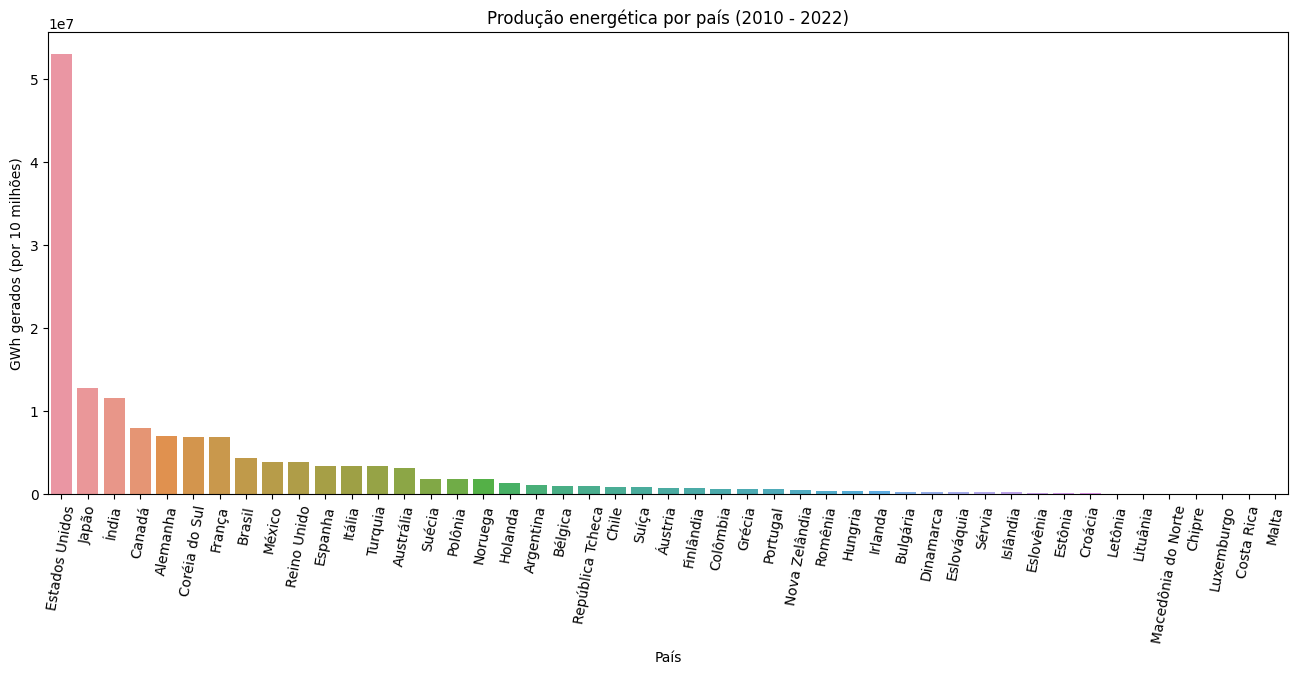

In [32]:
# Plot

plt.figure(figsize = (16, 6))
sns.barplot(data = df_producao_mundial,
            y = 'GWh_gerados',
            x = 'pais').set(title = 'Produção energética por país (2010 - 2022)', 
                            xlabel = 'País', 
                            ylabel = 'GWh gerados (por 10 milhões)')
plt.xticks(rotation = 80)
plt.show()

# Gráfico matriz energética dos Estados Unidos

In [33]:
df_eua = df.loc[df['pais'] == 'Estados Unidos']
df_eua.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
940,Estados Unidos,Janeiro 2010,2010,Janeiro,Hidroelétrica,24283.860,0.066664
941,Estados Unidos,Janeiro 2010,2010,Janeiro,Eólica,6964.964,0.019120
942,Estados Unidos,Janeiro 2010,2010,Janeiro,Solar,28.868,0.000079
943,Estados Unidos,Janeiro 2010,2010,Janeiro,Geotermal,1333.378,0.003660
944,Estados Unidos,Janeiro 2010,2010,Janeiro,Nuclear,72569.314,0.199218


In [34]:
df_producao_eua = df_eua.groupby('fonte_energetica')['GWh_gerados'].sum().reset_index().sort_values(by = 'GWh_gerados',
                                                                                        ascending = False)

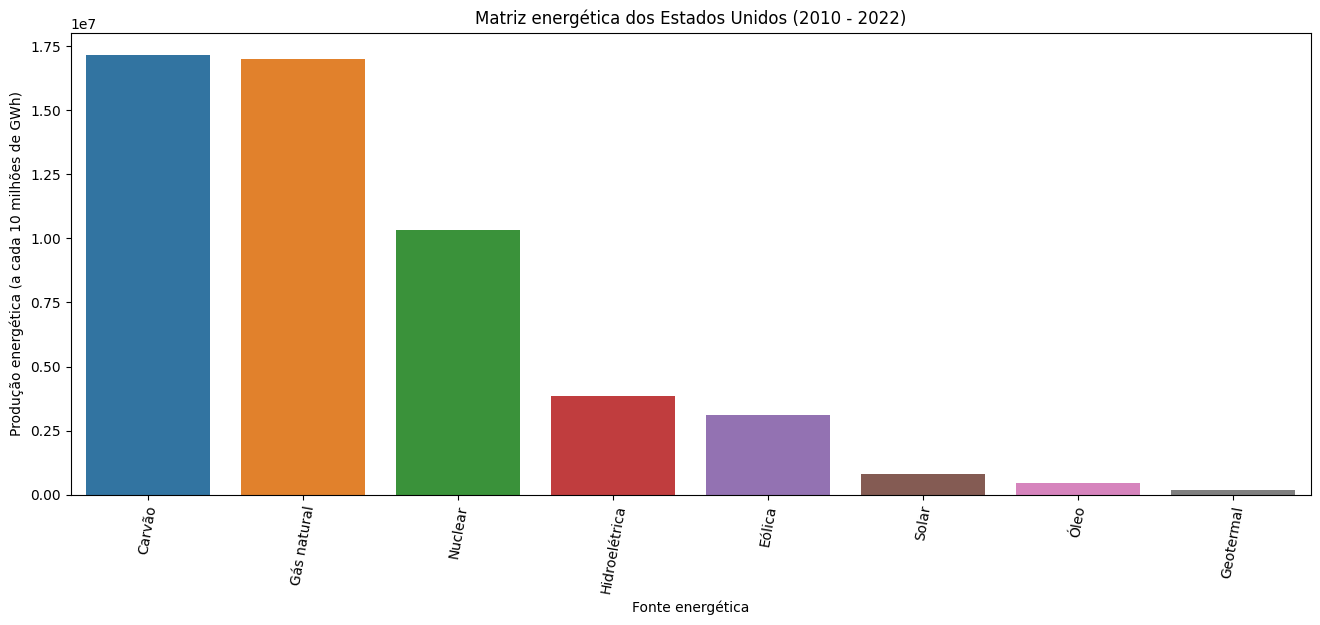

In [35]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df_producao_eua,
            y = 'GWh_gerados',
            x ='fonte_energetica').set(title = 'Matriz energética dos Estados Unidos (2010 - 2022)',
                                       xlabel = 'Fonte energética',
                                       ylabel = 'Produção energética (a cada 10 milhões de GWh)')
plt.xticks(rotation = 80)
plt.show()

# 

# Gráfico da matriz energética brasileira

In [36]:
df_brasil = df.loc[df['pais'] == 'Brasil']
df_brasil.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
58426,Brasil,Janeiro 2015,2015,Janeiro,Hidroelétrica,34343.374,0.681045
58427,Brasil,Janeiro 2015,2015,Janeiro,Eólica,1543.120,0.030601
58428,Brasil,Janeiro 2015,2015,Janeiro,Solar,2.613,0.000052
58429,Brasil,Janeiro 2015,2015,Janeiro,Geotermal,0.000,0.000000
58431,Brasil,Janeiro 2015,2015,Janeiro,Nuclear,1344.027,0.026653


In [37]:
df_producao_brasil = df_brasil.groupby('fonte_energetica')['GWh_gerados'].sum().reset_index().sort_values(by = 'GWh_gerados',
                                                                                        ascending = False)

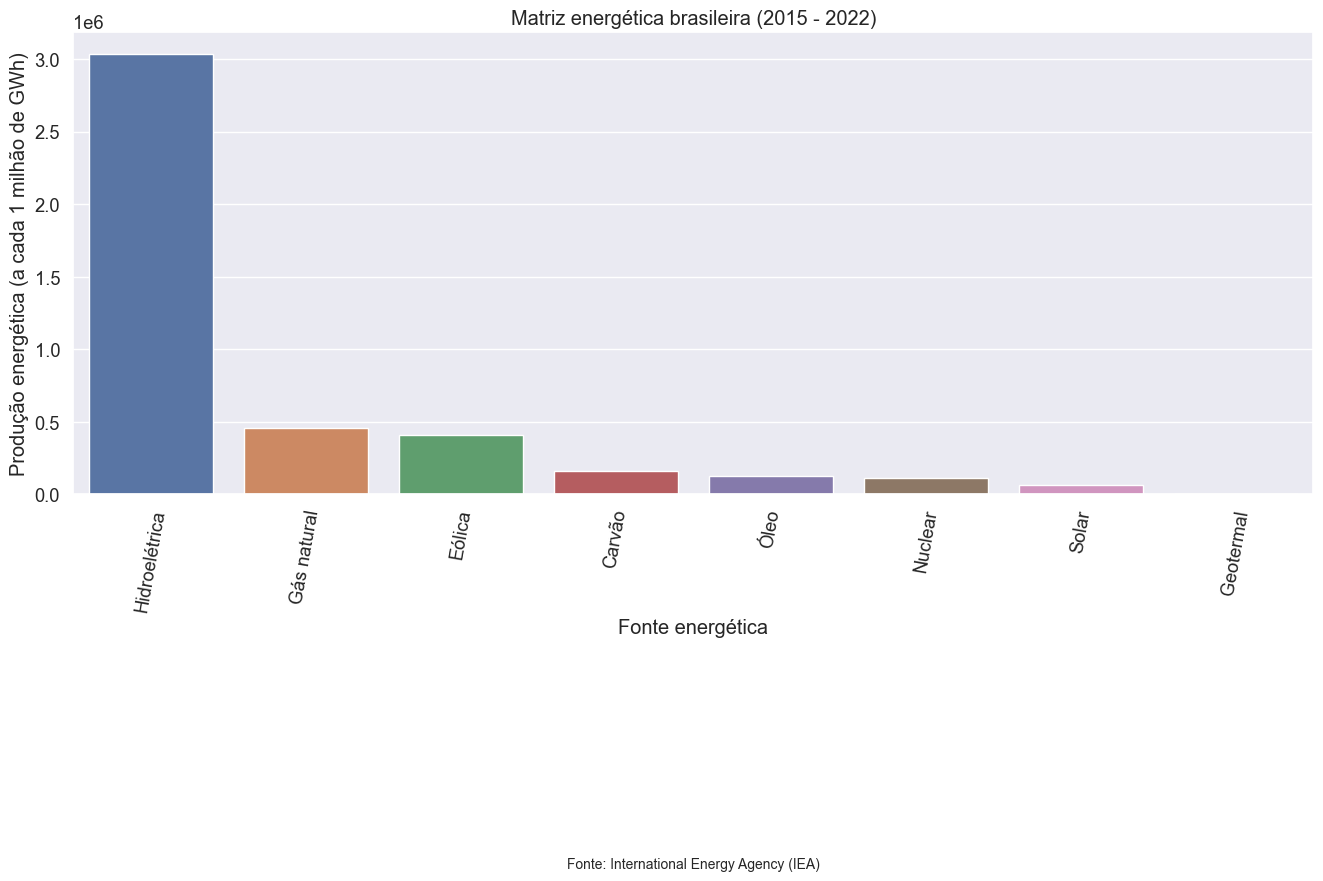

In [38]:
sns.set(font_scale=1.2)
plt.figure(figsize = (16, 6))
sns.barplot(data = df_producao_brasil,
            y = 'GWh_gerados',
            x ='fonte_energetica').set(title = 'Matriz energética brasileira (2015 - 2022)',
                                       xlabel = 'Fonte energética',
                                       ylabel = 'Produção energética (a cada 1 milhão de GWh)')
plt.xticks(rotation = 80)
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.8), xycoords='axes fraction', fontsize=10, ha='center', va='center')

plt.show()

Hidroelétrica:

In [39]:
df_hidroeletrica_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Hidroelétrica'].groupby('ano')['GWh_gerados'].sum()
df_hidroeletrica_brasil.head(15)

ano
2015    355076.900000
2016    375970.336000
2017    366095.556000
2018    383925.867265
2019    393898.286431
2020    392363.943840
2021    341102.693763
2022    423007.746164
Name: GWh_gerados, dtype: float64

In [40]:
cagr_hidroeletrica_brasil = (423007.746164/355076.900000) ** (1/8) - 1
print(f'O CAGR é: {cagr_hidroeletrica_brasil:.2%}')

O CAGR é: 2.21%


Gás Natural:

In [41]:
df_gas_natural_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Gás natural'].groupby('ano')['GWh_gerados'].sum()
df_gas_natural_brasil.head(15)

ano
2015    74597.376000
2016    53007.399000
2017    61556.034000
2018    51259.756786
2019    56821.135040
2020    50256.080100
2021    84426.157095
2022    28251.209794
Name: GWh_gerados, dtype: float64

In [42]:
cagr_gas_natural_brasil = (28251.209794/74597.376000) ** (1/8) - 1
print(f'O CAGR é: {cagr_gas_natural_brasil:.2%}')

O CAGR é: -11.43%


Eólica:

In [43]:
df_eolica_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Eólica'].groupby('ano')['GWh_gerados'].sum()
df_eolica_brasil.head(15)

ano
2015    21465.900000
2016    33240.086000
2017    42059.308000
2018    48116.275696
2019    55425.765780
2020    56480.199931
2021    71499.912310
2022    80698.565108
Name: GWh_gerados, dtype: float64

In [44]:
cagr_eolica_brasil = (80698.565108/21465.900000) ** (1/8) - 1
print(f'O CAGR é: {cagr_eolica_brasil:.2%}')

O CAGR é: 18.00%


Carvão:

In [45]:
df_carvao_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Carvão'].groupby('ano')['GWh_gerados'].sum()
df_carvao_brasil.head(15)

ano
2015    25381.313000
2016    23732.457000
2017    21042.163000
2018    19170.567303
2019    20030.754220
2020    16486.423120
2021    25060.206313
2022     9380.223516
Name: GWh_gerados, dtype: float64

In [46]:
cagr_carvao_brasil = (9380.223516/25381.313000) ** (1/8) - 1
print(f'O CAGR é: {cagr_carvao_brasil:.2%}')

O CAGR é: -11.70%


Óleo:

In [47]:
df_oleo_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Óleo'].groupby('ano')['GWh_gerados'].sum()
df_oleo_brasil.head(15)

ano
2015    26929.756000
2016    14062.672000
2017    14672.043000
2018    11754.876849
2019     9610.881480
2020    10091.820260
2021    33766.696651
2022     2793.062839
Name: GWh_gerados, dtype: float64

In [48]:
cagr_oleo_brasil = (2793.062839/26929.756000) ** (1/8) - 1
print(f'O CAGR é: {cagr_oleo_brasil:.2%}')

O CAGR é: -24.67%


Nuclear:

In [49]:
df_nuclear_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Nuclear'].groupby('ano')['GWh_gerados'].sum()
df_nuclear_brasil.head(15)

ano
2015    13907.351000
2016    14973.952000
2017    14856.152000
2018    14794.505006
2019    15161.094561
2020    13209.442119
2021    13825.679378
2022    13684.322262
Name: GWh_gerados, dtype: float64

In [50]:
cagr_nuclear_brasil = (13684.322262/13907.351000) ** (1/8) - 1
print(f'O CAGR é: {cagr_nuclear_brasil:.2%}')

O CAGR é: -0.20%


Solar:

In [51]:
df_solar_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Solar'].groupby('ano')['GWh_gerados'].sum()
df_solar_brasil.head(15)

ano
2015       58.652000
2016       84.498000
2017      827.103000
2018     3441.059096
2019     6588.033210
2020    10642.309919
2021    13702.791200
2022    27224.347185
Name: GWh_gerados, dtype: float64

In [52]:
cagr_solar_brasil = (27224.347185/58.652000) ** (1/8) - 1
print(f'O CAGR é: {cagr_solar_brasil:.2%}')

O CAGR é: 115.44%


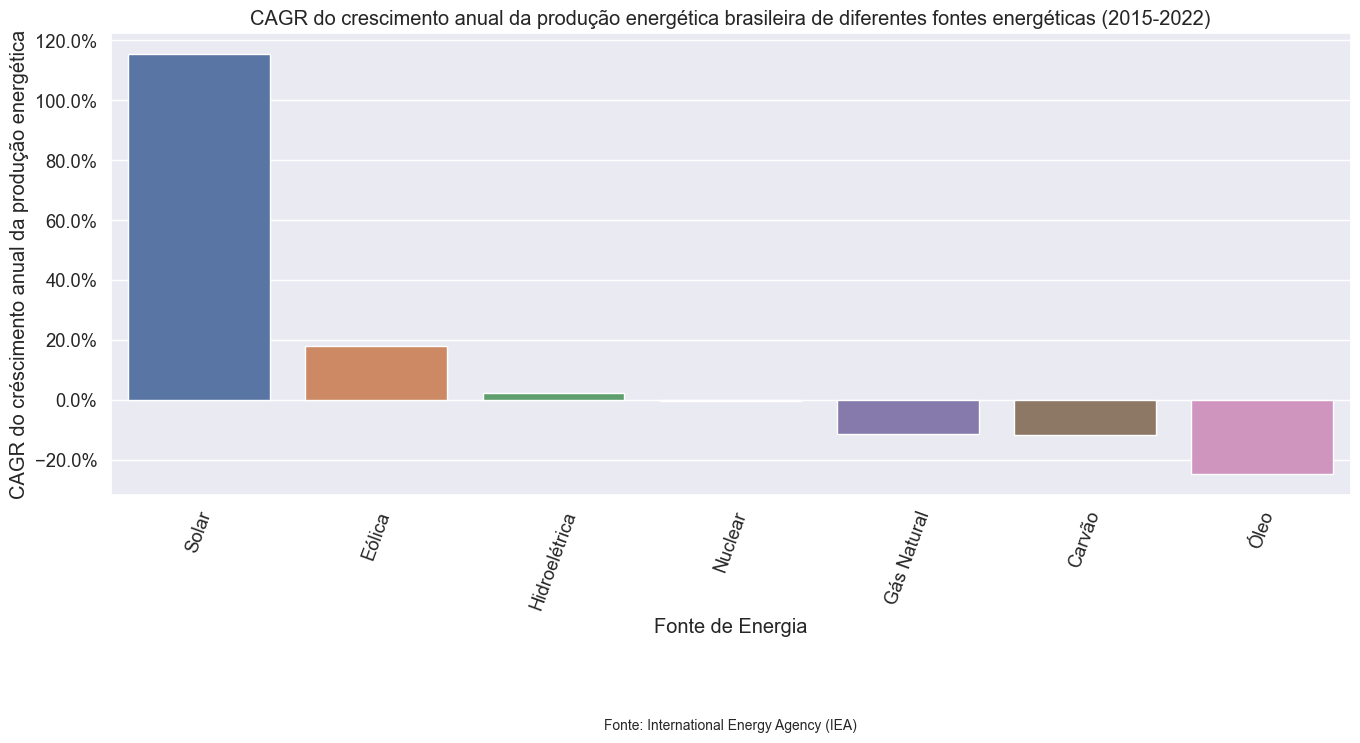

In [53]:
fontes_brasil = ['Hidroelétrica', 'Gás Natural', 'Eólica', 'Carvão', 'Óleo', 'Nuclear', 'Solar']
valores_cagr_brasil = [cagr_hidroeletrica_brasil, cagr_gas_natural_brasil, cagr_eolica_brasil, cagr_carvao_brasil, cagr_oleo_brasil, cagr_nuclear_brasil, cagr_solar_brasil]

sns.set(font_scale=1.2)
plt.figure(figsize = (16, 6))
sns.barplot(x=fontes_brasil, y=valores_cagr_brasil, order=sorted(fontes_brasil, key=lambda x: -valores_cagr_brasil[fontes_brasil.index(x)]))

formatter = mtick.PercentFormatter(1.0, decimals=1)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fonte de Energia')
plt.ylabel('CAGR do créscimento anual da produção energética')
plt.title('CAGR do crescimento anual da produção energética brasileira de diferentes fontes energéticas (2015-2022)')

plt.xticks(rotation = 70)
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.5), xycoords='axes fraction', fontsize=10, ha='center', va='center')

plt.show()

# 

# Energia solar no Brasil

In [54]:
df_solar_brasil = df_brasil.loc[df_brasil['fonte_energetica'] == 'Solar']
df_solar_brasil.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
58428,Brasil,Janeiro 2015,2015,Janeiro,Solar,2.613,0.000052
59634,Brasil,Fevereiro 2015,2015,Fevereiro,Solar,2.475,0.000056
60841,Brasil,Março 2015,2015,Março,Solar,3.151,0.000065
62048,Brasil,Abril 2015,2015,Abril,Solar,3.248,0.000071
63257,Brasil,Maio 2015,2015,Maio,Solar,2.699,0.000058


In [55]:
df_solar_br = df_solar_brasil.groupby('ano')['GWh_gerados'].sum()
df_solar_br.head()

ano
2015      58.652000
2016      84.498000
2017     827.103000
2018    3441.059096
2019    6588.033210
Name: GWh_gerados, dtype: float64

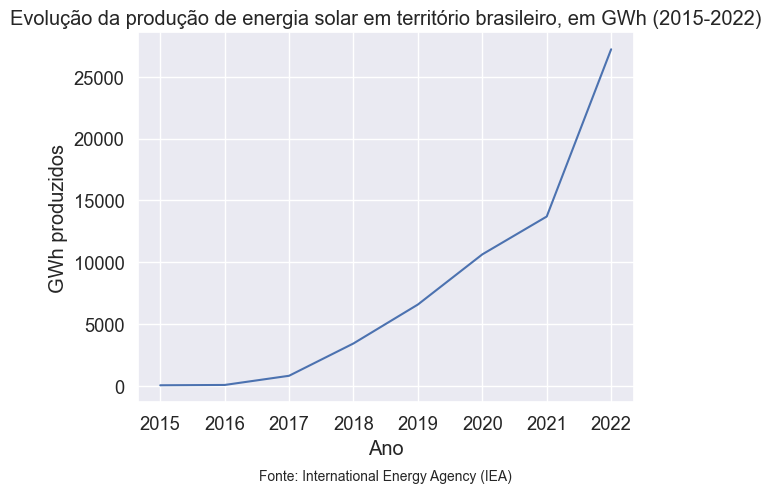

In [56]:
plt.plot(df_solar_br)

plt.title('Evolução da produção de energia solar em território brasileiro, em GWh (2015-2022)')
plt.xlabel('Ano')
plt.ylabel('GWh produzidos')
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center', va='center')

plt.show()

# 

# Matriz energética mundial

In [57]:
df_matriz_energética_mundial = df.groupby('fonte_energetica')['GWh_gerados'].sum().reset_index().sort_values(by = 'GWh_gerados',
                                                                                        ascending = False)

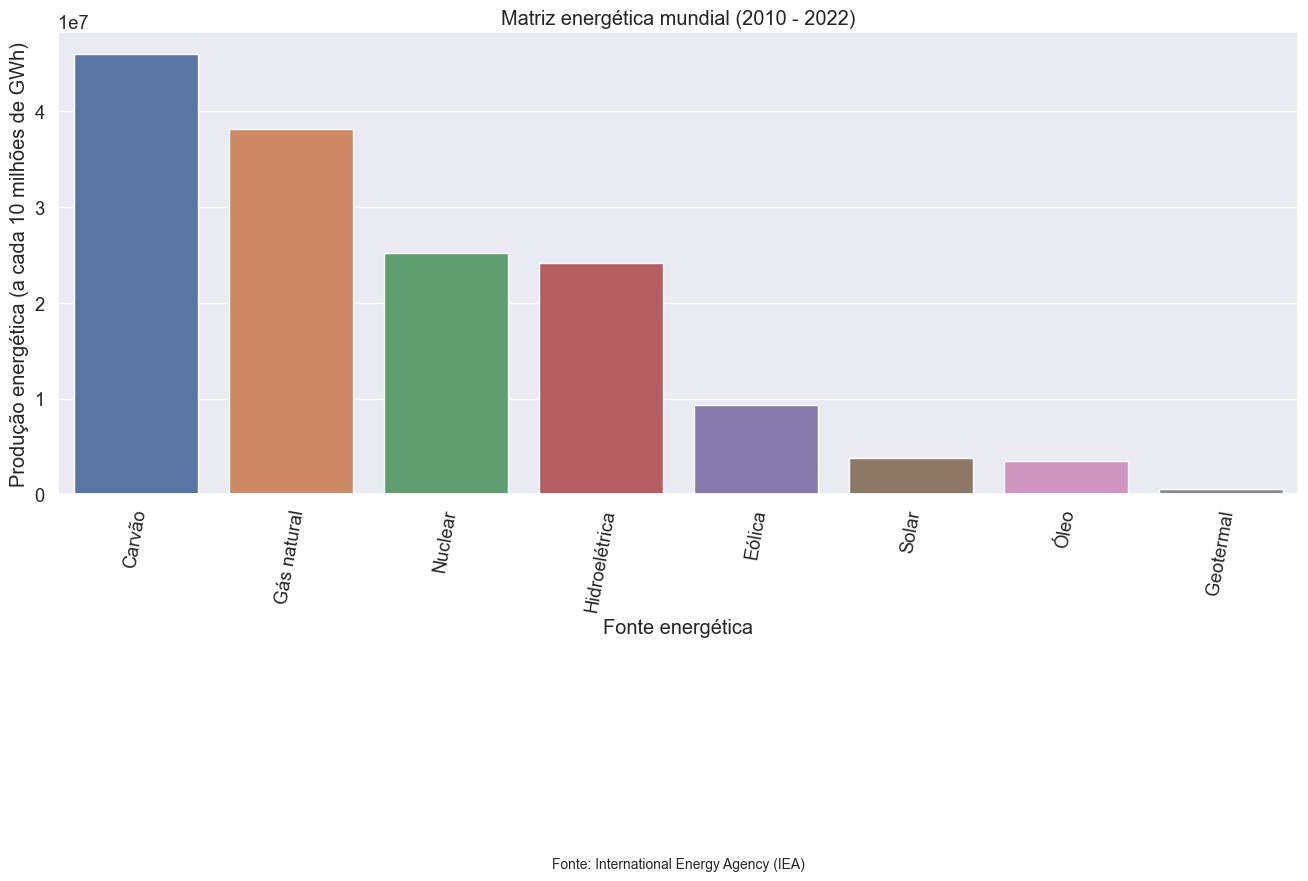

In [58]:
sns.set(font_scale=1.2)
plt.figure(figsize = (16, 6))
sns.barplot(data = df_matriz_energética_mundial,
            y = 'GWh_gerados',
            x ='fonte_energetica').set(title = 'Matriz energética mundial (2010 - 2022)',
                                       xlabel = 'Fonte energética',
                                       ylabel = 'Produção energética (a cada 10 milhões de GWh)')
plt.xticks(rotation = 80)
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.8), xycoords='axes fraction', fontsize=10, ha='center', va='center')

plt.show()

# 

# Cálculo do CAGR das fontes energéticas globais (2010-2022)

Carvão:

In [59]:
df_carvao_mundo = df.loc[df['fonte_energetica'] == 'Carvão'].groupby('ano')['GWh_gerados'].sum()
df_carvao_mundo.head(15)

ano
2010    3.484643e+06
2011    3.394687e+06
2012    3.246492e+06
2013    3.297962e+06
2014    3.260750e+06
2015    4.042311e+06
2016    3.956461e+06
2017    3.943111e+06
2018    3.928351e+06
2019    3.535521e+06
2020    3.095042e+06
2021    3.399508e+06
2022    3.310919e+06
Name: GWh_gerados, dtype: float64

In [60]:
cagr_carvao_mundo = (3.310919e+06/3.484643e+06) ** (1/13) - 1
print(f'O CAGR é: {cagr_carvao_mundo:.2%}')

O CAGR é: -0.39%


Gás Natural:

In [61]:
df_gas_natural_mundo = df.loc[df['fonte_energetica'] == 'Gás natural'].groupby('ano')['GWh_gerados'].sum()
df_gas_natural_mundo.head(15)

ano
2010    2.435725e+06
2011    2.487483e+06
2012    2.633299e+06
2013    2.494164e+06
2014    2.482270e+06
2015    2.906144e+06
2016    3.035178e+06
2017    3.041628e+06
2018    3.199354e+06
2019    3.321607e+06
2020    3.353959e+06
2021    3.353482e+06
2022    3.377659e+06
Name: GWh_gerados, dtype: float64

In [62]:
cagr_gas_natural_mundo = (3.377659e+06/2.435725e+06) ** (1/13) - 1
print(f'O CAGR é: {cagr_gas_natural_mundo:.2%}')

O CAGR é: 2.55%


Nuclear:

In [63]:
df_nuclear_mundo = df.loc[df['fonte_energetica'] == 'Nuclear'].groupby('ano')['GWh_gerados'].sum()
df_nuclear_mundo.head(15)

ano
2010    2.186604e+06
2011    2.047770e+06
2012    1.860819e+06
2013    1.872848e+06
2014    1.888303e+06
2015    1.956142e+06
2016    1.955135e+06
2017    1.941493e+06
2018    1.956449e+06
2019    1.988484e+06
2020    1.870796e+06
2021    1.909816e+06
2022    1.791342e+06
Name: GWh_gerados, dtype: float64

In [64]:
cagr_nuclear_mundo = (1.791342e+06/2.186604e+06) ** (1/13) - 1
print(f'O CAGR é: {cagr_nuclear_mundo:.2%}')

O CAGR é: -1.52%


Hidroelétrica:

In [65]:
df_hidroeletrica_mundo = df.loc[df['fonte_energetica'] == 'Hidroelétrica'].groupby('ano')['GWh_gerados'].sum()
df_hidroeletrica_mundo.head(15)

ano
2010    1.418078e+06
2011    1.437283e+06
2012    1.446257e+06
2013    1.466312e+06
2014    1.493152e+06
2015    2.043131e+06
2016    2.096792e+06
2017    2.088087e+06
2018    2.144495e+06
2019    2.124021e+06
2020    2.167878e+06
2021    2.084178e+06
2022    2.122727e+06
Name: GWh_gerados, dtype: float64

In [66]:
cagr_hidroeletrica_mundo = (2.122727e+06/1.418078e+06) ** (1/13) - 1
print(f'O CAGR é: {cagr_hidroeletrica_mundo:.2%}')

O CAGR é: 3.15%


Eólica:

In [67]:
df_eolica_mundo = df.loc[df['fonte_energetica'] == 'Eólica'].groupby('ano')['GWh_gerados'].sum()
df_eolica_mundo.head(15)

ano
2010    2.663341e+05
2011    3.299052e+05
2012    3.782467e+05
2013    4.463453e+05
2014    4.841707e+05
2015    6.168231e+05
2016    6.906404e+05
2017    7.990630e+05
2018    8.616718e+05
2019    9.636252e+05
2020    1.070525e+06
2021    1.137357e+06
2022    1.271738e+06
Name: GWh_gerados, dtype: float64

In [68]:
cagr_eolica_mundo = (1.271738e+06/2.663341e+05) ** (1/13) - 1
print(f'O CAGR é: {cagr_eolica_mundo:.2%}')

O CAGR é: 12.78%


Solar: 

In [69]:
df_solar_mundo = df.loc[df['fonte_energetica'] == 'Solar'].groupby('ano')['GWh_gerados'].sum()
df_solar_mundo.head(15)

ano
2010     30625.479000
2011     62054.918000
2012     92237.513000
2013    118125.058000
2014    149958.179000
2015    197550.377867
2016    240148.067191
2017    294883.988416
2018    351923.021248
2019    411484.704075
2020    469786.468432
2021    597356.195718
2022    740500.410266
Name: GWh_gerados, dtype: float64

In [70]:
cagr_solar_mundo = (740500.410266/30625.479000) ** (1/13) - 1
print(f'O CAGR é: {cagr_solar_mundo:.2%}')

O CAGR é: 27.77%


Óleo:

In [71]:
df_oleo_mundo = df.loc[df['fonte_energetica'] == 'Óleo'].groupby('ano')['GWh_gerados'].sum()
df_oleo_mundo.head(15)

ano
2010    286791.868000
2011    303584.114000
2012    379016.243000
2013    323272.790000
2014    285184.975000
2015    320004.310716
2016    291611.117265
2017    251111.842647
2018    233519.450494
2019    202818.283875
2020    197418.208277
2021    227536.862163
2022    216167.708025
Name: GWh_gerados, dtype: float64

In [72]:
cagr_oleo_mundo = (216167.708025/286791.868000) ** (1/13) - 1
print(f'O CAGR é: {cagr_oleo_mundo:.2%}')

O CAGR é: -2.15%


Geotermal:

In [73]:
df_geotermal_mundo = df.loc[df['fonte_energetica'] == 'Geotermal'].groupby('ano')['GWh_gerados'].sum()
df_geotermal_mundo.head(15)

ano
2010    39547.812000
2011    40329.758000
2012    40629.125000
2013    41983.053000
2014    43964.322000
2015    45811.218000
2016    46827.566000
2017    47753.760000
2018    49403.386057
2019    50233.346129
2020    51359.071662
2021    52858.591494
2022    54292.654478
Name: GWh_gerados, dtype: float64

In [74]:
cagr_geotermal_mundo = (54292.654478/39547.812000) ** (1/13) - 1
print(f'O CAGR é: {cagr_geotermal_mundo:.2%}')

O CAGR é: 2.47%


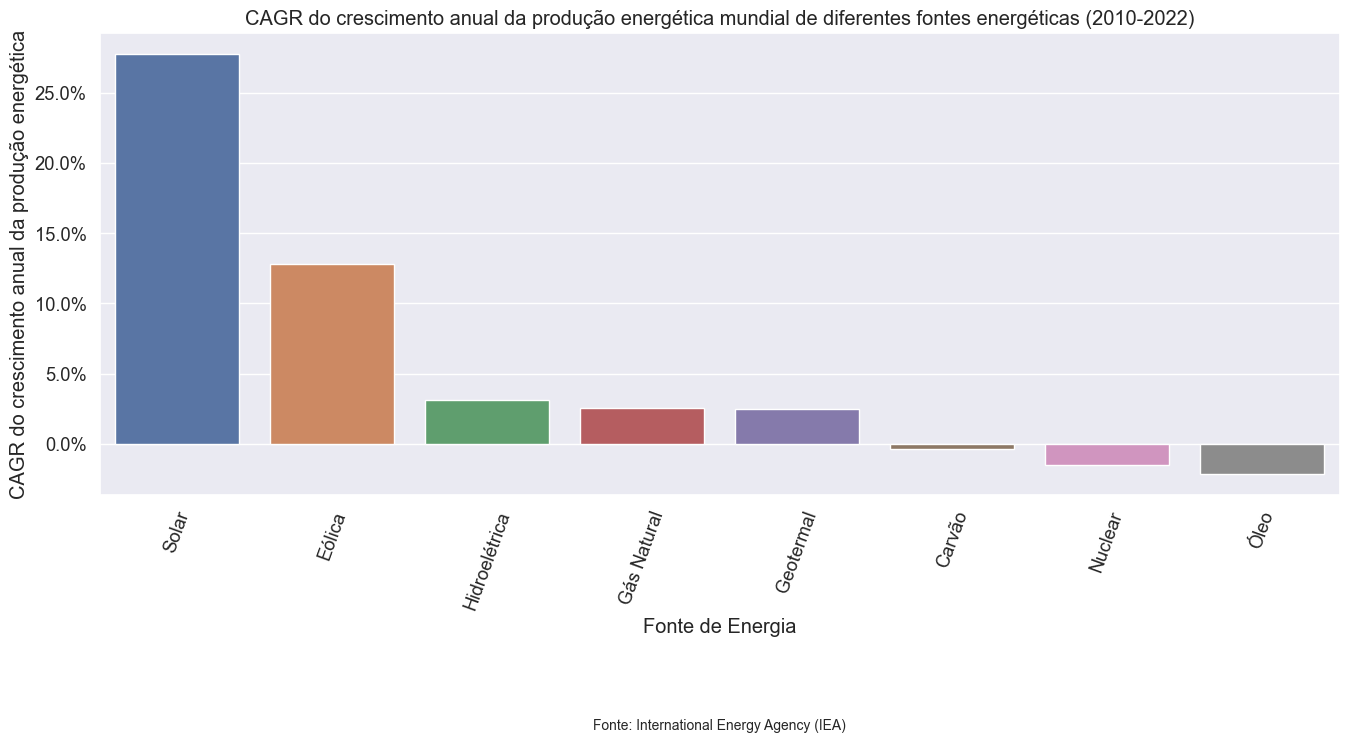

In [75]:
fontes = ['Carvão', 'Gás Natural', 'Nuclear', 'Hidroelétrica', 'Eólica', 'Solar', 'Óleo', 'Geotermal']
valores_cagr_mundo = [cagr_carvao_mundo, cagr_gas_natural_mundo, cagr_nuclear_mundo, cagr_hidroeletrica_mundo, cagr_eolica_mundo, cagr_solar_mundo, cagr_oleo_mundo, cagr_geotermal_mundo]

sns.set(font_scale=1.2)
plt.figure(figsize = (16, 6))
sns.barplot(x=fontes, y=valores_cagr_mundo, order=sorted(fontes, key=lambda x: -valores_cagr_mundo[fontes.index(x)]))

formatter = mtick.PercentFormatter(1.0, decimals=1)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fonte de Energia')
plt.ylabel('CAGR do crescimento anual da produção energética')
plt.title('CAGR do crescimento anual da produção energética mundial de diferentes fontes energéticas (2010-2022)')

plt.xticks(rotation = 70)
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.5), xycoords='axes fraction', fontsize=10, ha='center', va='center')


plt.show()

# 

# Evolução da produção de energia solar no mundo (2010-2022)

In [76]:
df_solar = df.loc[df['fonte_energetica'] == 'Solar']
df_solar.head()

,pais,data,ano,mes,fonte_energetica,GWh_gerados,participacao_total_gerado_pais
2,Austrália,Janeiro 2010,2010,Janeiro,Solar,49.216,0.002373
22,Áustria,Janeiro 2010,2010,Janeiro,Solar,2.864,0.000485
47,Bélgica,Janeiro 2010,2010,Janeiro,Solar,17.450,0.002092
72,Canadá,Janeiro 2010,2010,Janeiro,Solar,1.898,0.000031
118,República Tcheca,Janeiro 2010,2010,Janeiro,Solar,6.205,0.000799


In [77]:
df_solar_mundo = df_solar.groupby('ano')['GWh_gerados'].sum()
df_solar_mundo.head(15)

ano
2010     30625.479000
2011     62054.918000
2012     92237.513000
2013    118125.058000
2014    149958.179000
2015    197550.377867
2016    240148.067191
2017    294883.988416
2018    351923.021248
2019    411484.704075
2020    469786.468432
2021    597356.195718
2022    740500.410266
Name: GWh_gerados, dtype: float64

In [79]:
cagr_solar_mundo = (740500.410266/30625.479000) ** (1/13) - 1
print(f'O CAGR é: {cagr_solar_mundo:.2%}')

O CAGR é: 27.77%


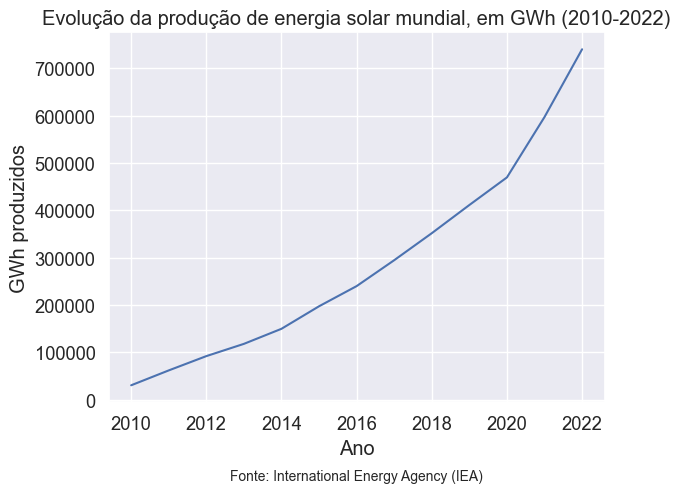

In [80]:
plt.plot(df_solar_mundo)

plt.title('Evolução da produção de energia solar mundial, em GWh (2010-2022)')
plt.xlabel('Ano')
plt.ylabel('GWh produzidos')
plt.annotate('Fonte: International Energy Agency (IEA)', xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center', va='center')

plt.show()